### https://www.kaggle.com/competitions/drawing-with-llms

In [1]:
import kagglehub
import pandas as pd

train_path = kagglehub.competition_download('drawing-with-llms', 'train.csv')
train = pd.read_csv(train_path)

train.head()

/home/vino/anaconda3/envs/kaggle/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,id,description
0,04c411,a starlit night over snow-covered peaks
1,215136,black and white checkered pants
2,3e2bc6,crimson rectangles forming a chaotic grid
3,61d7a8,burgundy corduroy pants with patch pockets and...
4,6f2ca7,orange corduroy overalls


In [ ]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 2048  # Choose any! We auto support RoPE Scaling internally!
dtype = (
    None  # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
)
load_in_4bit = False # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",  # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",  # We also uploaded 4bit for 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit",  # New Mistral 12b 2x faster!
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",  # Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",  # Phi-3.5 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",  # Gemma 2x faster!
]  # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Qwen2.5-Coder-7B-Instruct",
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.2.15: Fast Qwen2 patching. Transformers: 4.49.0.
   \\   /|    GPU: NVIDIA GeForce RTX 4070 Ti SUPER. Max memory: 15.693 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [ ]:
import re
import json
from unsloth.chat_templates import get_chat_template

# Define your tokenizer with a flexible chat template
tokenizer = get_chat_template(
    tokenizer,
    chat_template="chatml",  # Flexible for multiple models (Zephyr, LLaMA, Mistral, etc.)
    mapping={
        "role": "from", 
        "content": "value", 
        "user": "human", 
        "assistant": "gpt"
    },
    map_eos_token=True,  # Ensures <|im_end|> maps to </s> for end-of-sentence
)

# Enable faster inference (2x speed up)
FastLanguageModel.for_inference(model)

def get_svg_code(text):
    """
    This function generates a minimal, valid SVG based on the provided text input.
    """

    # Structured chat template for SVG generation request
    messages = [
        {
            "from": "system", 
            "value": "You are a helpful assistant specialized in generating minimal, valid SVG code"
        },
        {
            "from": "human", 
            "value": f"Now, create an SVG based on the following topic: {text}"
        }
    ]
    
    # Apply the tokenizer and prepare the inputs for the model
    inputs = tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        padding=True,
        truncation=False,
        add_generation_prompt=True,  # Necessary for generation to work
        return_tensors="pt",
    ).to("cuda")
    
    # Create an attention mask to avoid padding interference during inference
    attention_mask = (inputs != tokenizer.pad_token_id).int() 

    # Generate output using the model
    outputs = model.generate(
        input_ids=inputs,
        attention_mask=attention_mask,
        temperature=0.5,  # Low temperature for deterministic results
        max_new_tokens=2048,  # Adjust max tokens if needed
        use_cache=True
    )
    
    # Decode and return the unformatted output (processed into a clean response)
    unformatted_output = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    return unformatted_output



In [ ]:
svg_code=get_svg_code(train['description'].iloc[1])

In [ ]:
tmp=svg_code.split('assistant\n')[1].split('<svg')[1]
tmp='<svg'+tmp
tmp=tmp+' </svg>'

In [ ]:
tmp

In [1]:
# We can play with our Model and render its SVG output (don't export!)
from IPython.display import SVG, display
display(SVG(tmp))

NameError: name 'tmp' is not defined

In [ ]:
tmp

In [ ]:
<svg width="800" height="600" xmlns="http://www.w3.org/2000/svg">
  <!-- Background -->
  <rect x="0" y="0" width="100%" height="100%" fill="#202020" opacity="0.8" />
  
  <!-- Snow-Covered Peaks -->
  <polygon points="100,300 150,250 200,300 250,250 300,300 350,250 400,300" fill="#FFFFFF" />
  <polygon points="500,500 550,450 600,500 650,500 700,500 750,450 800,500" fill="#FFFFFF" />
  
  <!-- Moon -->
  <circle cx="700" cy="100" r="50" fill="#FFFFFF" />
  
  <!-- Stars -->
  <circle cx="100" cy="200" r="2" fill="#FFFFFF" />
  <circle cx="200" cy="100" r="2" fill="#FFFFFF" />
  <circle cx="300" cy="300" r="2" fill="#FFFFFF" />
  <circle cx="400" cy="150" r="2" fill="#FFFFFF" />
  <circle cx="500" cy="250" r="2" fill="#FFFFFF" />
  <circle cx="600" cy="400" r="2" fill="#FFFFFF" />
  <circle cx="700" cy="200" r="2" fill="#FFFFFF" />
  <circle cx="800" cy="100" r="2" fill="#FFFFFF" />
  
  <!-- Text - Optional -->
  <text x="10" y="580" font-family="Arial" font-size="20" fill="#FFFFFF">Starlit Night Over Snow-Covered Peaks</text>
</svg>

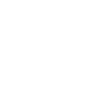

In [1]:
from IPython.display import SVG, display

# SVG code as a string
svg_code = '''<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 100 100">
  <!-- Background - snow-covered peaks -->
  <rect x="0" y="0" width="100" height="100" fill="#ffffff" />
  
  <!-- Stars in the sky -->
  <circle cx="20" cy="30" r="1" fill="#ffffff" />
  <circle cx="40" cy="20" r="1" fill="#ffffff" />
  <circle cx="60" cy="25" r="1" fill="#ffffff" />
  <circle cx="80" cy="35" r="1" fill="#ffffff" />
  <circle cx="30" cy="50" r="1" fill="#ffffff" />
  <circle cx="50" cy="60" r="1" fill="#ffffff" />
  <circle cx="70" cy="55" r="1" fill="#ffffff" />
  <circle cx="90" cy="45" r="1" fill="#ffffff" />
</svg>'''

# Display the SVG
display(SVG(data=svg_code))